In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm
from scipy import stats
import scipy

In [102]:
Q2=pd.read_csv('/content/drive/My Drive/CSV Files DS203/Assignment 4/Summer Clothes Sales/summer-products-with-rating-and-performance_2020-08.csv')#Reading file
#display(Q2)

print("\nNumber of Rows(Records):",Q2.shape[0], "\nNumber of Columns(Variables):", Q2.shape[1],"\n")#rows and columns
#print(Q2.dtypes)
#display(Q2)

Q2=Q2.drop(['merchant_info_subtitle'],axis=1)
Q2=Q2.drop(['theme'],axis=1)
Q2=Q2.drop(['crawl_month'],axis=1)
Q2=Q2.drop(['product_picture'],axis=1)
Q2=Q2.drop(['product_url'],axis=1)
Q2=Q2.drop(['merchant_profile_picture'],axis=1)
Q2=Q2.drop(['merchant_has_profile_picture'],axis=1)
Q2=Q2.drop(['merchant_name'],axis=1)
Q2=Q2.drop(['urgency_text'],axis=1)
Q2=Q2.drop(['has_urgency_banner'],axis=1)
Q2=Q2.drop(['tags'],axis=1)
Q2=Q2.drop(['badge_local_product'],axis=1)
Q2=Q2.drop(['badge_product_quality'],axis=1)
Q2=Q2.drop(['badge_fast_shipping'],axis=1)
Q2=Q2.drop(['title_orig'],axis=1)
Q2=Q2.drop(['shipping_option_price'],axis=1)
Q2=Q2.drop(['countries_shipped_to'],axis=1)
Q2=Q2.drop(['shipping_option_name'],axis=1)
Q2=Q2.drop(['shipping_is_express'],axis=1)
Q2=Q2.drop(['product_variation_inventory'],axis=1)                  #dropping unnecessary columns for analysis
Q2=Q2.drop(['inventory_total'],axis=1)
Q2=Q2.drop(['merchant_title'],axis=1)
Q2=Q2.drop(['merchant_rating_count'],axis=1)
Q2=Q2.drop(['merchant_rating'],axis=1)
Q2=Q2.drop(['merchant_id'],axis=1)
Q2=Q2.drop(['product_id'],axis=1)
Q2=Q2.drop(['product_variation_size_id'],axis=1)
Q2=Q2.drop(['currency_buyer'],axis=1)
Q2=Q2.drop(['badges_count'],axis=1)
Q2=Q2.drop(['product_color'],axis=1)

val=Q2.columns
print(val)
display(Q2)


Number of Rows(Records): 1573 
Number of Columns(Variables): 43 

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'origin_country'],
      dtype='object')


title  ...  origin_country
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  ...              CN
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...  ...              CN
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...  ...              CN
3     Hot Summer Cool T-shirt pour les femmes Mode T...  ...              CN
4     Femmes Shorts d'été à lacets taille élastique ...  ...              CN
...                                                 ...  ...             ...
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...  ...              CN
1569  10 couleurs femmes shorts d'été lacent ceintur...  ...              CN
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...  ...              CN
1571  Mode femmes d'été sans manches robes col en V ...  ...              CN
1572  Pantalon de yoga pour femmes à la mode Slim Fi...  ...              CN

[1573 rows x 13 columns]

In [103]:
df=Q2[Q2['origin_country']=='CN'].reset_index().drop('index',axis=1)
display(df)

title  ...  origin_country
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  ...              CN
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...  ...              CN
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...  ...              CN
3     Hot Summer Cool T-shirt pour les femmes Mode T...  ...              CN
4     Femmes Shorts d'été à lacets taille élastique ...  ...              CN
...                                                 ...  ...             ...
1511  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...  ...              CN
1512  10 couleurs femmes shorts d'été lacent ceintur...  ...              CN
1513  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...  ...              CN
1514  Mode femmes d'été sans manches robes col en V ...  ...              CN
1515  Pantalon de yoga pour femmes à la mode Slim Fi...  ...              CN

[1516 rows x 13 columns]

#Q2a.

In [104]:
#selecting appropriate columns with respect to units sold
print(Q2['units_sold'].unique())
df=Q2[Q2['units_sold']>=10].reset_index().drop('index',axis=1).reset_index()
#display(df)
df=pd.DataFrame([df['index'],df['units_sold'],df['price'],df['rating']]).T
#display(df)

#df1=df[df['units_sold']==10].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean()
df1=df[df['units_sold']==50].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df2=df[df['units_sold']==100].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df3=df[df['units_sold']==1000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df4=df[df['units_sold']==5000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df5=df[df['units_sold']==10000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df6=df[df['units_sold']==20000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
#df8=df[df['units_sold']==50000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean()

display(df1)
print("\nFor Units Sold="+str(df1['units_sold'][0])+":")
print("  Mean Rating="+str(df1['rating'].mean()))
print("  Variance of Ratings="+str(df1['rating'].var())+"\n") 

display(df2)
print("\nFor Units Sold="+str(df2['units_sold'][0])+":")
print("  Mean Rating="+str(df2['rating'].mean()))
print("  Variance of Ratings="+str(df2['rating'].var())+"\n") 

display(df3)
print("\nFor Units Sold="+str(df3['units_sold'][0])+":")
print("  Mean Rating="+str(df3['rating'].mean()))
print("  Variance of Ratings="+str(df3['rating'].var())+"\n") 

display(df4)
print("\nFor Units Sold="+str(df4['units_sold'][0])+":")
print("  Mean Rating="+str(df4['rating'].mean()))
print("  Variance of Ratings="+str(df4['rating'].var())+"\n")

display(df5)
print("\nFor Units Sold="+str(df5['units_sold'][0])+":")
print("  Mean Rating="+str(df5['rating'].mean()))
print("  Variance of Ratings="+str(df5['rating'].var())+"\n")

display(df6)
print("\nFor Units Sold="+str(df6['units_sold'][0])+":")
print("  Mean Rating="+str(df6['rating'].mean()))
print("  Variance of Ratings="+str(df6['rating'].var())+"\n")

[   100  20000   5000     10  50000   1000  10000 100000     50      1
      7      2      3      8      6]


price  units_sold    rating
0    1.00        50.0  3.750000
1    1.71        50.0  4.670000
2    1.75        50.0  3.000000
3    2.00        50.0  3.880000
4    2.81        50.0  3.640000
5    2.89        50.0  5.000000
6    3.00        50.0  4.250000
7    3.76        50.0  3.500000
8    3.85        50.0  3.330000
9    3.86        50.0  4.000000
10   4.00        50.0  1.000000
11   4.65        50.0  5.000000
12   4.83        50.0  2.000000
13   5.00        50.0  5.000000
14   6.00        50.0  3.368333
15   7.00        50.0  3.500000
16   8.00        50.0  4.206667
17   9.00        50.0  4.188333
18  11.00        50.0  4.000000
19  12.00        50.0  4.180000
20  13.00        50.0  4.330000
21  15.00        50.0  4.400000
22  16.00        50.0  3.860000
23  20.00        50.0  4.170000
24  25.00        50.0  3.170000
25  27.00        50.0  4.250000


For Units Sold=50.0:
  Mean Rating=3.832435897435898
  Variance of Ratings=0.780606495726496



price  units_sold  rating
0    1.00       100.0   3.430
1    1.66       100.0   3.750
2    1.67       100.0   3.590
3    1.68       100.0   3.670
4    1.72       100.0   3.908
..    ...         ...     ...
76  19.00       100.0   4.330
77  20.00       100.0   3.000
78  23.00       100.0   3.860
79  26.00       100.0   4.150
80  49.00       100.0   4.670

[81 rows x 3 columns]


For Units Sold=100.0:
  Mean Rating=3.759228810873586
  Variance of Ratings=0.2366208268277151



price  units_sold  rating
0    1.00      1000.0   3.800
1    1.65      1000.0   3.670
2    1.66      1000.0   4.210
3    1.68      1000.0   3.855
4    1.70      1000.0   3.860
..    ...         ...     ...
62  17.00      1000.0   4.180
63  18.00      1000.0   3.630
64  19.00      1000.0   3.205
65  22.00      1000.0   3.710
66  24.00      1000.0   4.210

[67 rows x 3 columns]


For Units Sold=1000.0:
  Mean Rating=3.7478963829182974
  Variance of Ratings=0.08691071322370557



price  units_sold    rating
0    2.00      5000.0  3.842500
1    2.66      5000.0  3.440000
2    2.81      5000.0  3.910000
3    3.00      5000.0  3.685000
4    3.66      5000.0  3.190000
5    3.67      5000.0  3.320000
6    3.70      5000.0  3.470000
7    3.73      5000.0  4.140000
8    3.81      5000.0  3.740000
9    3.83      5000.0  3.760000
10   4.00      5000.0  4.040000
11   4.69      5000.0  3.950000
12   4.74      5000.0  4.050000
13   5.00      5000.0  3.635714
14   5.65      5000.0  4.145000
15   5.66      5000.0  3.890000
16   5.69      5000.0  4.060000
17   5.74      5000.0  3.900000
18   5.78      5000.0  3.575000
19   5.79      5000.0  3.780000
20   5.83      5000.0  3.990000
21   5.89      5000.0  3.250000
22   5.90      5000.0  3.380000
23   6.00      5000.0  3.867273
24   7.00      5000.0  3.756190
25   8.00      5000.0  3.939118
26   9.00      5000.0  3.881200
27  11.00      5000.0  3.754815
28  12.00      5000.0  3.725000
29  13.00      5000.0  3.872000
30  14.00      5000.0  3.882500
31  15.00      5000.0  3.730000
32  16.00      5000.0  3.876667
33  18.00      5000.0  4.060000
34  19.00      5000.0  3.930000


For Units Sold=5000.0:
  Mean Rating=3.7833707605062226
  Variance of Ratings=0.06079174183458021



price  units_sold    rating
0    1.77     10000.0  4.030000
1    1.91     10000.0  4.050000
2    2.00     10000.0  4.175000
3    2.70     10000.0  4.130000
4    3.67     10000.0  4.310000
5    3.74     10000.0  4.230000
6    3.83     10000.0  3.640000
7    3.88     10000.0  3.660000
8    4.00     10000.0  3.740000
9    4.66     10000.0  4.280000
10   4.67     10000.0  4.100000
11   4.81     10000.0  4.000000
12   4.94     10000.0  3.930000
13   5.00     10000.0  3.957500
14   5.65     10000.0  3.650000
15   5.66     10000.0  4.290000
16   5.68     10000.0  3.890000
17   5.74     10000.0  3.610000
18   5.77     10000.0  3.850000
19   5.78     10000.0  3.840000
20   5.83     10000.0  4.220000
21   5.84     10000.0  3.450000
22   5.85     10000.0  3.550000
23   5.90     10000.0  3.640000
24   6.00     10000.0  4.025333
25   7.00     10000.0  3.884444
26   8.00     10000.0  3.829038
27   9.00     10000.0  3.907500
28  11.00     10000.0  3.867143
29  12.00     10000.0  3.656667
30  13.00     10000.0  4.010000
31  14.00     10000.0  4.070000
32  16.00     10000.0  4.050000
33  17.00     10000.0  4.160000
34  18.00     10000.0  4.170000


For Units Sold=10000.0:
  Mean Rating=3.9386464503750216
  Variance of Ratings=0.05374382288856308



price  units_sold    rating
0    2.00     20000.0  3.870000
1    2.65     20000.0  3.400000
2    2.71     20000.0  4.030000
3    2.83     20000.0  3.620000
4    3.00     20000.0  4.120000
5    3.65     20000.0  3.930000
6    3.66     20000.0  4.480000
7    3.79     20000.0  3.930000
8    3.92     20000.0  3.760000
9    5.00     20000.0  3.997500
10   5.65     20000.0  4.290000
11   5.66     20000.0  4.140000
12   5.67     20000.0  3.630000
13   5.71     20000.0  3.900000
14   5.78     20000.0  4.000000
15   5.80     20000.0  3.470000
16   5.87     20000.0  3.980000
17   5.88     20000.0  4.070000
18   6.00     20000.0  3.870000
19   7.00     20000.0  4.066667
20   8.00     20000.0  3.811304
21   9.00     20000.0  3.853333
22  11.00     20000.0  3.800000
23  12.00     20000.0  4.007500
24  13.00     20000.0  3.467500
25  14.00     20000.0  3.610000
26  15.00     20000.0  4.340000
27  16.00     20000.0  4.270000
28  18.00     20000.0  4.230000
29  19.00     20000.0  4.400000
30  22.00     20000.0  3.660000


For Units Sold=20000.0:
  Mean Rating=3.9356065918653576
  Variance of Ratings=0.07712795044526202



#Q2b.


For Units Sold=50.0:


<Figure size 720x360 with 0 Axes>

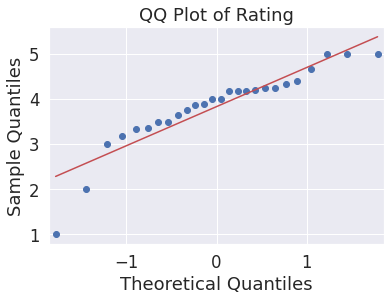


For Units Sold=100.0:


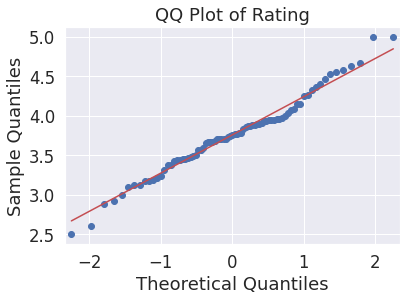


For Units Sold=1000.0:


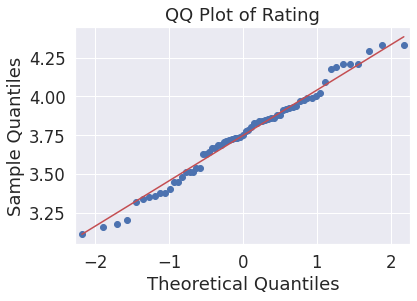


For Units Sold=5000.0:


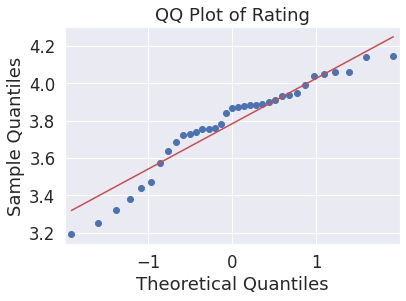


For Units Sold=10000.0:


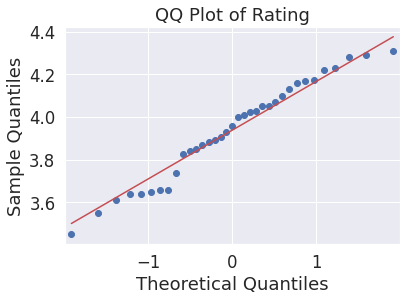


For Units Sold=20000.0:


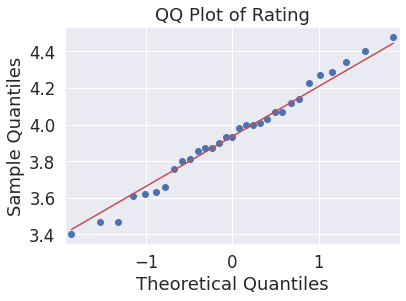

In [105]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5) 
print("\nFor Units Sold="+str(df1['units_sold'][0])+":")
sm.qqplot(df1['rating'], line='s')
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df2['units_sold'][0])+":")
sm.qqplot(df2['rating'], line='s')
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df3['units_sold'][0])+":")
sm.qqplot(df3['rating'], line='s')
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df4['units_sold'][0])+":")
sm.qqplot(df4['rating'], line='s')
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df5['units_sold'][0])+":")
sm.qqplot(df5['rating'], line='s')
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df6['units_sold'][0])+":")
sm.qqplot(df6['rating'], line='s')
plt.title('QQ Plot of Rating')
plt.show()

#Q2c, Q2d.

In [106]:
mean=df1['rating'].mean()
var=df1['rating'].var()
n=len(df1['rating'])
dif=df1['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df1['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))
#print("\n95% Confidence Interval:"+str(sm.stats.proportion_confint())))

mean=df2['rating'].mean()
var=df2['rating'].var()
n=len(df2['rating'])
dif=df2['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df2['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

mean=df3['rating'].mean()
var=df3['rating'].var()
n=len(df3['rating'])
dif=df3['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df3['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

mean=df4['rating'].mean()
var=df4['rating'].var()
n=len(df4['rating'])
dif=df4['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df4['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

mean=df5['rating'].mean()
var=df5['rating'].var()
n=len(df5['rating'])
dif=df5['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df5['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

mean=df6['rating'].mean()
var=df6['rating'].var()
n=len(df6['rating'])
dif=df6['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df6['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

print("\n\n AS evident, the category with maximum log likelihood(least negative) has best fit with the line of qq plot, or is nearest to a normal distribution.")


For Units Sold=50.0
Log Likelihood: -33.17250852670203
95% Confidence Interval:(3.492828221721944, 4.1720435731498515)

For Units Sold=100.0
Log Likelihood: -56.061520803241926
95% Confidence Interval:(3.653295617252179, 3.8651620044949926)

For Units Sold=1000.0
Log Likelihood: -12.732603659250195
95% Confidence Interval:(3.677305705980492, 3.818487059856103)

For Units Sold=5000.0
Log Likelihood: -0.1575754864896941
95% Confidence Interval:(3.701686879792512, 3.865054641219933)

For Units Sold=10000.0
Log Likelihood: 1.9988658155213905
95% Confidence Interval:(3.8618434216971864, 4.015449479052857)

For Units Sold=20000.0
Log Likelihood: -3.771606626481169
95% Confidence Interval:(3.8378439026369935, 4.033369281093721)


 AS evident, the category with maximum log likelihood(least negative) has best fit with the line of qq plot, or is nearest to a normal distribution.


#Q2e.
**Welch T-Test**: Null Hypothesis- Mean differences are zero for both sets of data, i.e. means are equal.

**Wilcoxon Ranked Sign Test**: Null Hypothesis- Median Differences between both sets of data are zero.

In both tests, the alternative hypothesis is the exact complement of the null hypothesis. If the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%, i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

In [107]:
means=[df1['rating'].mean(),df2['rating'].mean(),df3['rating'].mean(),df4['rating'].mean(),df5['rating'].mean(),df6['rating'].mean()]
print(means)

print("\nMeans chosen: Units sold=10000("+str(means[4])+") and Units Sold=20000("+str(means[5])+")\n")

n=len(df6['rating'])
print(n)
df5=df5.loc[0:n-1]
display(df5)
display(df6)
m1=df5['rating'].mean()
m2=df6['rating'].mean()
v1=df5['rating'].var()
v2=df6['rating'].var()

welcht=(m1-m2)/np.sqrt((v1/n)+(v2/n))
print("\n\nCalculated Welch T-Test statistic = "+str(welcht))
print(scipy.stats.ttest_ind(df5['rating'], df6['rating'], equal_var= False))#holds true to our calculations
print(scipy.stats.wilcoxon(x=df5['rating'], y=df6['rating']))

print("\nIn both cases, p-value>0.05, so NULL HYPOTHESIS CANNOT BE REJECTED, means/medians as appropriate are similar to each other(from same distribution).")
#scipy.stats.wilcoxon(x=df5['rating'], y=df6['rating'])

[3.832435897435898, 3.759228810873586, 3.7478963829182974, 3.7833707605062226, 3.9386464503750216, 3.9356065918653576]

Means chosen: Units sold=10000(3.9386464503750216) and Units Sold=20000(3.9356065918653576)

31


price  units_sold    rating
0    1.77     10000.0  4.030000
1    1.91     10000.0  4.050000
2    2.00     10000.0  4.175000
3    2.70     10000.0  4.130000
4    3.67     10000.0  4.310000
5    3.74     10000.0  4.230000
6    3.83     10000.0  3.640000
7    3.88     10000.0  3.660000
8    4.00     10000.0  3.740000
9    4.66     10000.0  4.280000
10   4.67     10000.0  4.100000
11   4.81     10000.0  4.000000
12   4.94     10000.0  3.930000
13   5.00     10000.0  3.957500
14   5.65     10000.0  3.650000
15   5.66     10000.0  4.290000
16   5.68     10000.0  3.890000
17   5.74     10000.0  3.610000
18   5.77     10000.0  3.850000
19   5.78     10000.0  3.840000
20   5.83     10000.0  4.220000
21   5.84     10000.0  3.450000
22   5.85     10000.0  3.550000
23   5.90     10000.0  3.640000
24   6.00     10000.0  4.025333
25   7.00     10000.0  3.884444
26   8.00     10000.0  3.829038
27   9.00     10000.0  3.907500
28  11.00     10000.0  3.867143
29  12.00     10000.0  3.656667
30  13.00     10000.0  4.010000

price  units_sold    rating
0    2.00     20000.0  3.870000
1    2.65     20000.0  3.400000
2    2.71     20000.0  4.030000
3    2.83     20000.0  3.620000
4    3.00     20000.0  4.120000
5    3.65     20000.0  3.930000
6    3.66     20000.0  4.480000
7    3.79     20000.0  3.930000
8    3.92     20000.0  3.760000
9    5.00     20000.0  3.997500
10   5.65     20000.0  4.290000
11   5.66     20000.0  4.140000
12   5.67     20000.0  3.630000
13   5.71     20000.0  3.900000
14   5.78     20000.0  4.000000
15   5.80     20000.0  3.470000
16   5.87     20000.0  3.980000
17   5.88     20000.0  4.070000
18   6.00     20000.0  3.870000
19   7.00     20000.0  4.066667
20   8.00     20000.0  3.811304
21   9.00     20000.0  3.853333
22  11.00     20000.0  3.800000
23  12.00     20000.0  4.007500
24  13.00     20000.0  3.467500
25  14.00     20000.0  3.610000
26  15.00     20000.0  4.340000
27  16.00     20000.0  4.270000
28  18.00     20000.0  4.230000
29  19.00     20000.0  4.400000
30  22.00     20000.0  3.660000



Calculated Welch T-Test statistic = -0.29594732458077433
Ttest_indResult(statistic=-0.29594732458077433, pvalue=0.768317915078846)
WilcoxonResult(statistic=232.0, pvalue=0.7538554162501943)

In both cases, p-value>0.05, so NULL HYPOTHESIS CANNOT BE REJECTED, means/medians as appropriate are similar to each other(from same distribution).


#Q2f.
Taking difference and thus, by null hypothesis, mean difference must be zero. Applying a two-sided test(for one group/iteration) for the null hypothesis that the expected value (mean) of a sample of independent observations is equal to the sample mean.

In [108]:
sample=df6['rating']-df5['rating']
#print(sample)
samplemean=(df6['rating']-df5['rating']).mean()
#print(samplemean)
print(scipy.stats.ttest_1samp(sample,samplemean))
print("\nSince p-value is  approx. 1, it is evident that Null Hypothesis cannot be rejected, thus the means are really similar.")

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

Since p-value is  approx. 1, it is evident that Null Hypothesis cannot be rejected, thus the means are really similar.


#Q2g.
##This cell is a repeat from a former assignment(Assignment 5-Improving Graphs), as I have already done this analysis for an unrelated assignment(this is statistical tests), I have used the same here.

rating_count  rating  price  units_sold
0             54.0    3.76  16.00       100.0
1           6135.0    3.45   8.00     20000.0
2             14.0    3.57   8.00       100.0
3            579.0    4.03   8.00      5000.0
4             20.0    3.10   2.72       100.0
...            ...     ...    ...         ...
1568        1367.0    4.08   6.00     10000.0
1569          28.0    3.07   2.00       100.0
1570          59.0    3.71   5.00       100.0
1571           2.0    2.50  13.00       100.0
1572          14.0    4.07   7.00       100.0

[1573 rows x 4 columns]

Ratings will likely increase with increase in rating count





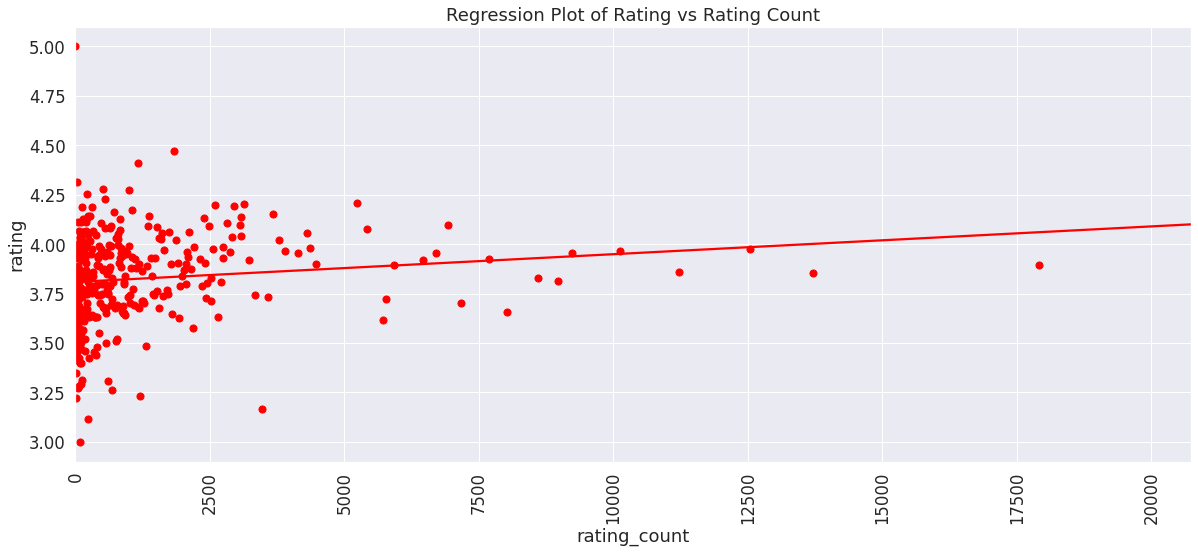

This is a cleaned up version of the previous graph, i.e. clutter is removed.





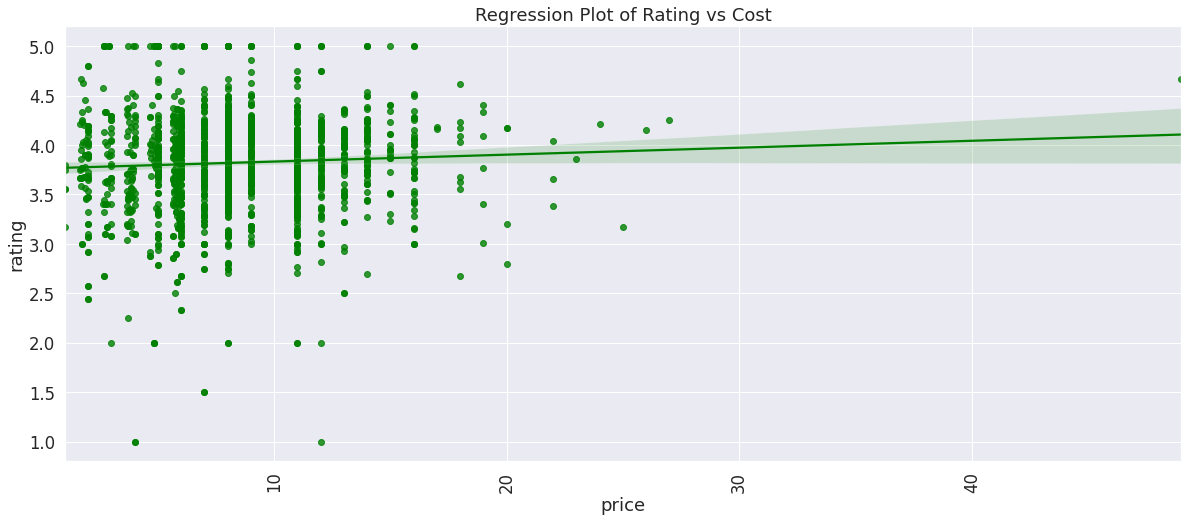

Ratings will most likely increase with increase in price of goods.





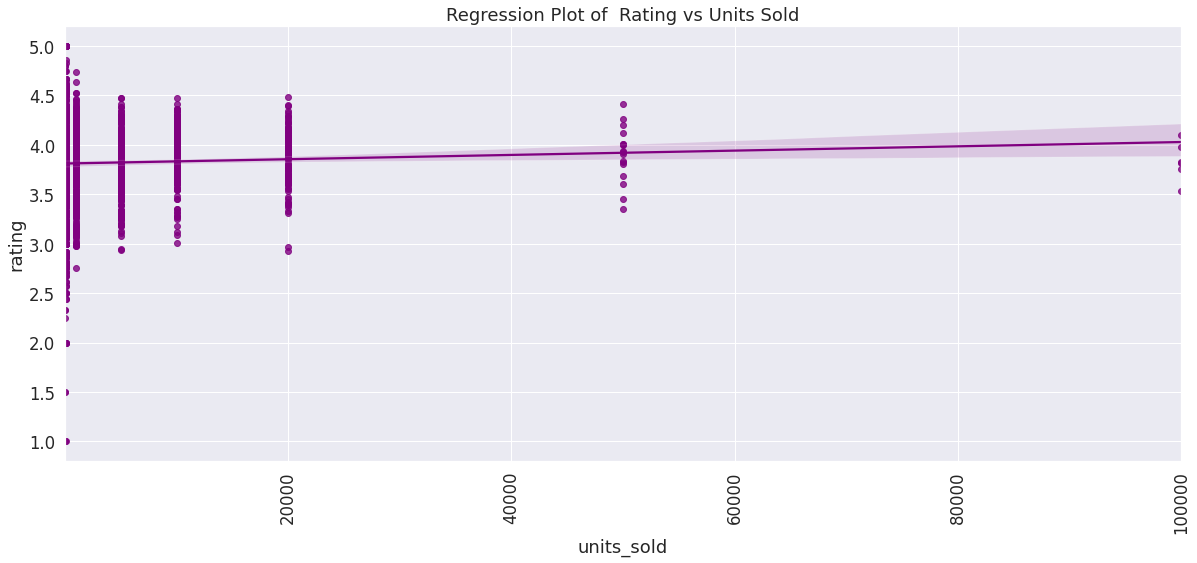

Ratings will mostly increase with no. of units sold.





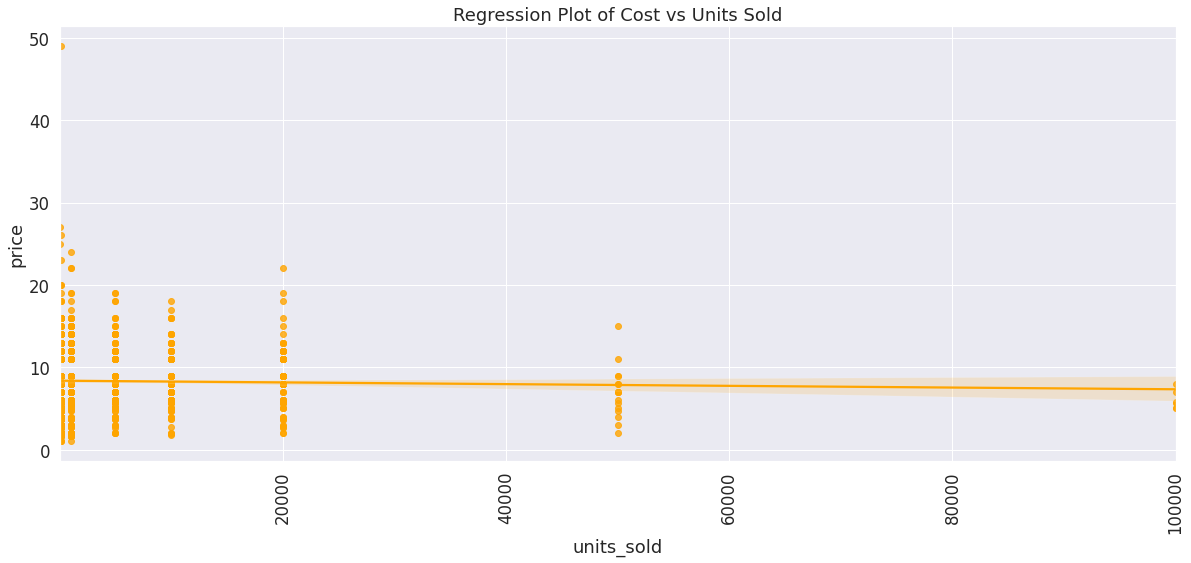

This curve is very significant, if the demand for thee goods goes up, the units sold goes up, and the market tries to reach equilibrium at a lower price. This regresion plot is accurate becuase it represents a market demand curve.


In [109]:
#labels are self explanatory, see output cell
df=pd.DataFrame([Q2['rating_count'],Q2['rating'],Q2['price'],Q2['units_sold']]).T
display(df)

plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
plt.title('Regression Plot of Rating vs Rating Count')
sns.regplot(x=df['rating_count'],y=df['rating'])
plt.xticks(rotation=90)
plt.show()
print("Ratings will likely increase with increase in rating count\n\n\n")

plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
plt.title('Regression Plot of Rating vs Rating Count')
sns.regplot(x=df['rating_count'],y=df['rating'],x_bins=500,ci=None,color='red')
plt.xticks(rotation=90)
plt.show()
print("This is a cleaned up version of the previous graph, i.e. clutter is removed.\n\n\n")

plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
plt.title('Regression Plot of Rating vs Cost')
sns.regplot(x=df['price'],y=df['rating'], color='green')#,x_bins=1000,ci=None)
plt.xticks(rotation=90)
plt.show()
print("Ratings will most likely increase with increase in price of goods.\n\n\n")

plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
plt.title('Regression Plot of  Rating vs Units Sold')
sns.regplot(x=df['units_sold'],y=df['rating'], color='purple')#,x_bins=1000,ci=None)
plt.xticks(rotation=90)
plt.show()
print("Ratings will mostly increase with no. of units sold.\n\n\n")

plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
plt.title('Regression Plot of Cost vs Units Sold')
sns.regplot(x=df['units_sold'],y=df['price'], color='orange')#,x_bins=1000,ci=None)
plt.xticks(rotation=90)
plt.show()
print("This curve is very significant, if the demand for thee goods goes up, the units sold goes up, and the market tries to reach equilibrium at a lower price. This regresion plot is accurate becuase it represents a market demand curve.")

#Q2h.
##Chi-Squared Test:
The chi-square test tests the null hypothesis that the categorical data has the given frequencies.



In [117]:
Q2=pd.read_csv('/content/drive/My Drive/CSV Files DS203/Assignment 4/Summer Clothes Sales/summer-products-with-rating-and-performance_2020-08.csv')#Reading file

df=pd.DataFrame([Q2['rating'],Q2['shipping_option_price'],Q2['units_sold'],Q2['uses_ad_boosts']]).T
display(df)

df1=df.groupby(['uses_ad_boosts']).count()
df2=df.groupby(['shipping_option_price']).count()
df3=df.groupby(['units_sold']).count()

display(df1)
display(df2)
display(df3)

print(scipy.stats.chisquare(df1['rating']))
print(scipy.stats.chisquare(df2['rating']))
print(scipy.stats.chisquare(df3['rating']))

print("Thus, we see that the possibility of existence of the second and third frequency distributions seem very improbable(p-value=0(<any confidence value), and the first slightly probable(p-value~0), according to the chi-squared test.")
print("The null hypothesis is rejected in these cases")

rating  shipping_option_price  units_sold  uses_ad_boosts
0       3.76                    4.0       100.0             0.0
1       3.45                    2.0     20000.0             1.0
2       3.57                    3.0       100.0             0.0
3       4.03                    2.0      5000.0             1.0
4       3.10                    1.0       100.0             1.0
...      ...                    ...         ...             ...
1568    4.08                    2.0     10000.0             1.0
1569    3.07                    1.0       100.0             1.0
1570    3.71                    2.0       100.0             0.0
1571    2.50                    3.0       100.0             0.0
1572    4.07                    2.0       100.0             1.0

[1573 rows x 4 columns]

rating  shipping_option_price  units_sold
uses_ad_boosts                                           
0.0                892                    892         892
1.0                681                    681         681

rating  units_sold  uses_ad_boosts
shipping_option_price                                    
1.0                       308         308             308
2.0                       619         619             619
3.0                       520         520             520
4.0                        76          76              76
5.0                        32          32              32
6.0                        12          12              12
7.0                         5           5               5
12.0                        1           1               1

rating  shipping_option_price  uses_ad_boosts
units_sold                                               
1.0              3                      3               3
2.0              2                      2               2
3.0              2                      2               2
6.0              1                      1               1
7.0              2                      2               2
8.0              4                      4               4
10.0            49                     49              49
50.0            76                     76              76
100.0          509                    509             509
1000.0         405                    405             405
5000.0         217                    217             217
10000.0        177                    177             177
20000.0        103                    103             103
50000.0         17                     17              17
100000.0         6                      6               6

Power_divergenceResult(statistic=28.30324221233312, pvalue=1.0372211455897217e-07)
Power_divergenceResult(statistic=2268.805467260013, pvalue=0.0)
Power_divergenceResult(statistic=3392.095359186269, pvalue=0.0)
Thus, we see that the possibility of existence of the second and third frequency distributions seem very improbable(p-value=0(<any confidence value), and the first slightly probable(p-value~0), according to the chi-squared test.
The null hypothesis is rejected in these cases
